<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S8/S8_AssignmentSolution(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [1]:
from __future__ import print_function
#this helps in plotting the graphs right below that particular cell and also gets stored in the notebook document
%matplotlib inline 
# mount the drive 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to your library in default search path
import sys
sys.path.append('/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library')

**Import packages from Drive**

In [0]:
from rohan_library import *  # consists of all the packages required
import execute # this is to train & test the model
import image_transformations # to apply different image transformations
import DataLoaders as loader
import visualizeData as viz
import cifar10_models as models # consists of CNN models built on CIFAR10 Dataset
from resNet import ResNet18
import utils 

**Apply Image Transforms**

In [0]:

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)

fillMeans = (np.array(channel_means)*255).astype(np.uint8)
trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)

trainTrans = trans.train_transforms([
                                     transforms.RandomRotation((-15.0, 15.0), fill=tuple(fillMeans)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.RandomVerticalFlip(p=0.5)
])
testTrans = trans.test_transforms()
                                       

**Load Train & Test Dataset**

In [5]:
train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = trainTrans)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = testTrans)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


**Dataloaders for Train & Test Dataset**

In [0]:

dl = loader.DataLoaders()
trainloader = dl.dataLoader(train)
testloader = dl.dataLoader(test) 


**Display random training Images**

plane   dog  deer  deer


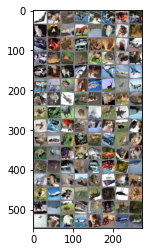

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
viz.plotImage(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Model Summary**

In [8]:

# !pip install torchsummary
from torchsummary import summary


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print('Device set to', device)


model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))


Device set to cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14

**Run the model**

In [10]:
incorrect_samples = []
model = ResNet18().to(device)


criterion = utils.cross_entropy_loss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=20)

model1 = execute.Test_Train()
EPOCHS = 20

for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler, criterion, L1lambda=1e-5)
  model1.test(model, device, testloader,"model.pt", criterion, incorrect_samples)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.3803954124450684 Batch_id=390 Accuracy=41.64: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.3285).  Saving model ...

Test set: Average loss: 1.3285, Accuracy: 5047/10000 (50.47%)

EPOCH: 2


Loss=2.031564712524414 Batch_id=390 Accuracy=54.93: 100%|██████████| 391/391 [00:29<00:00, 13.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.6197, Accuracy: 5726/10000 (57.26%)

EPOCH: 3


Loss=2.088188648223877 Batch_id=390 Accuracy=61.64: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.3285 --> 1.2286).  Saving model ...

Test set: Average loss: 1.2286, Accuracy: 6061/10000 (60.61%)

EPOCH: 4


Loss=1.5205503702163696 Batch_id=390 Accuracy=67.21: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.2286 --> 1.0360).  Saving model ...

Test set: Average loss: 1.0360, Accuracy: 7005/10000 (70.05%)

EPOCH: 5


Loss=1.5127582550048828 Batch_id=390 Accuracy=70.25: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.0360 --> 0.8119).  Saving model ...

Test set: Average loss: 0.8119, Accuracy: 6592/10000 (65.92%)

EPOCH: 6


Loss=1.3940988779067993 Batch_id=390 Accuracy=72.44: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.8119 --> 0.7760).  Saving model ...

Test set: Average loss: 0.7760, Accuracy: 7448/10000 (74.48%)

EPOCH: 7


Loss=1.6101914644241333 Batch_id=390 Accuracy=74.56: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.7760 --> 0.6756).  Saving model ...

Test set: Average loss: 0.6756, Accuracy: 7262/10000 (72.62%)

EPOCH: 8


Loss=1.135274052619934 Batch_id=390 Accuracy=76.09: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8572, Accuracy: 7591/10000 (75.91%)

EPOCH: 9


Loss=1.165675401687622 Batch_id=390 Accuracy=77.52: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8249, Accuracy: 7695/10000 (76.95%)

EPOCH: 10


Loss=1.2542455196380615 Batch_id=390 Accuracy=78.16: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9581, Accuracy: 7439/10000 (74.39%)

EPOCH: 11


Loss=1.270960807800293 Batch_id=390 Accuracy=79.55: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9279, Accuracy: 7839/10000 (78.39%)

EPOCH: 12


Loss=1.0114564895629883 Batch_id=390 Accuracy=80.58: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6756 --> 0.3233).  Saving model ...

Test set: Average loss: 0.3233, Accuracy: 7986/10000 (79.86%)

EPOCH: 13


Loss=0.8507030606269836 Batch_id=390 Accuracy=81.63: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7669, Accuracy: 8125/10000 (81.25%)

EPOCH: 14


Loss=0.8423633575439453 Batch_id=390 Accuracy=82.89: 100%|██████████| 391/391 [00:29<00:00, 13.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6861, Accuracy: 8123/10000 (81.23%)

EPOCH: 15


Loss=0.9978417158126831 Batch_id=390 Accuracy=84.04: 100%|██████████| 391/391 [00:29<00:00, 13.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.3233 --> 0.2087).  Saving model ...

Test set: Average loss: 0.2087, Accuracy: 8320/10000 (83.20%)

EPOCH: 16


Loss=0.7137438058853149 Batch_id=390 Accuracy=85.70: 100%|██████████| 391/391 [00:29<00:00, 13.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9380, Accuracy: 8488/10000 (84.88%)

EPOCH: 17


Loss=0.7654776573181152 Batch_id=390 Accuracy=87.17: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4018, Accuracy: 8663/10000 (86.63%)

EPOCH: 18


Loss=0.5963635444641113 Batch_id=390 Accuracy=89.10: 100%|██████████| 391/391 [00:29<00:00, 13.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4639, Accuracy: 8854/10000 (88.54%)

EPOCH: 19


Loss=0.648322343826294 Batch_id=390 Accuracy=90.90: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.2087 --> 0.1348).  Saving model ...

Test set: Average loss: 0.1348, Accuracy: 8920/10000 (89.20%)

EPOCH: 20


Loss=0.6083296537399292 Batch_id=390 Accuracy=91.80: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]



Test set: Average loss: 0.7600, Accuracy: 8948/10000 (89.48%)



**Plot Training & Test Stats**

Text(0.5, 1.0, 'Test Accuracy')

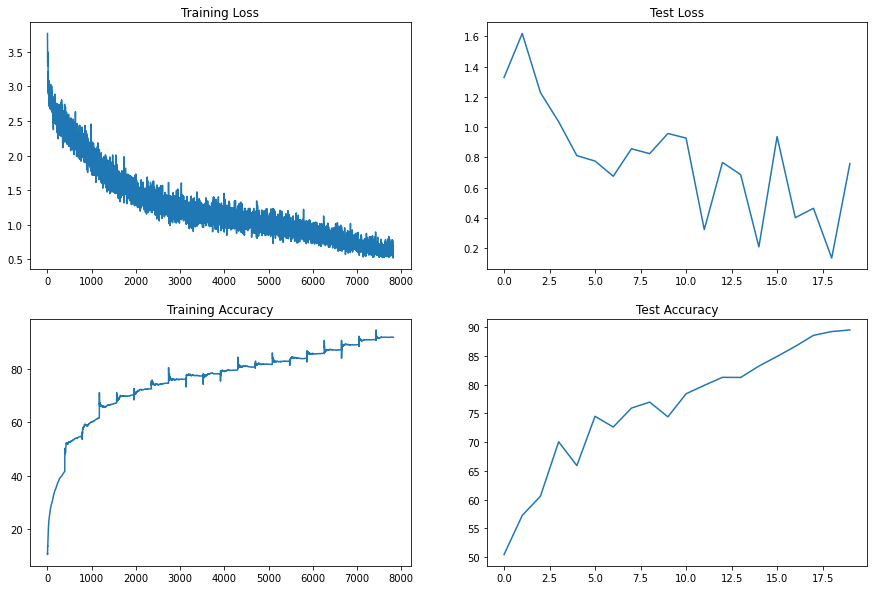

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")


**Display Misclassified Images from the Model**

Misclassifed Images from Model
******************************


<Figure size 936x936 with 0 Axes>

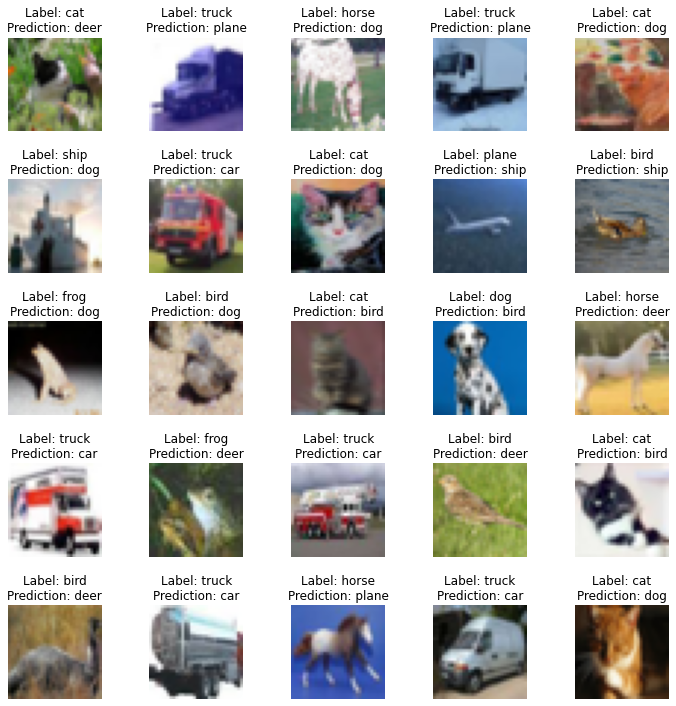

In [12]:
print('Misclassifed Images from Model')
print('*'*30)
viz.misclassifiedOnes(model,testloader, incorrect_samples,'CIFAR10.png')
